In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
iris_df = pd.read_csv('iris.csv')
iris_df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
print(f'Number of rows:', iris_df.shape[0] ,' and Number of Columns: ', iris_df.shape[1])

Number of rows: 150  and Number of Columns:  6


In [4]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
#checking for null values
def find_dirty_values(data):
    dtypes = pd.DataFrame(data.dtypes,columns=["Data Type"])
    dtypes["Unique Values"]=data.nunique().sort_values(ascending=True)
    dtypes["Null Values"]=data.isnull().sum()
    dtypes["% null Values"]=data.isnull().sum()/len(data)
    return dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

In [6]:
null_df = find_dirty_values(iris_df)
null_df

,Data Type,Unique Values,Null Values,% null Values
Id,int64,150,0,0.000000
SepalLengthCm,float64,35,0,0.000000
SepalWidthCm,float64,23,0,0.000000
PetalLengthCm,float64,43,0,0.000000
PetalWidthCm,float64,22,0,0.000000
Species,object,3,0,0.000000


In [7]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<Axes: ylabel='Species'>

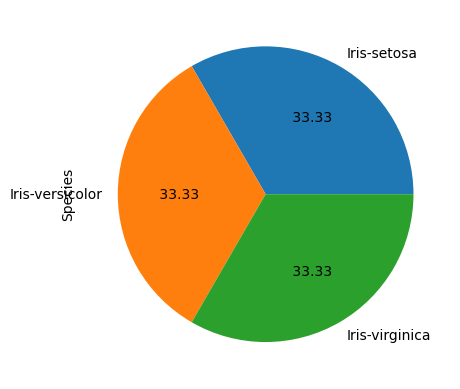

In [9]:
#Data Visualization
iris_df['Species'].value_counts().plot(kind = 'pie', autopct = '% .2f')

In [10]:
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
iris_df1 = iris_df.iloc[:, 0:4]

In [12]:
# numerical ananlyis = Heatmap
corelation_matrix  = iris_df1.corr()
corelation_matrix

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
Id,1.000000,0.716676,-0.397729,0.882747
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000


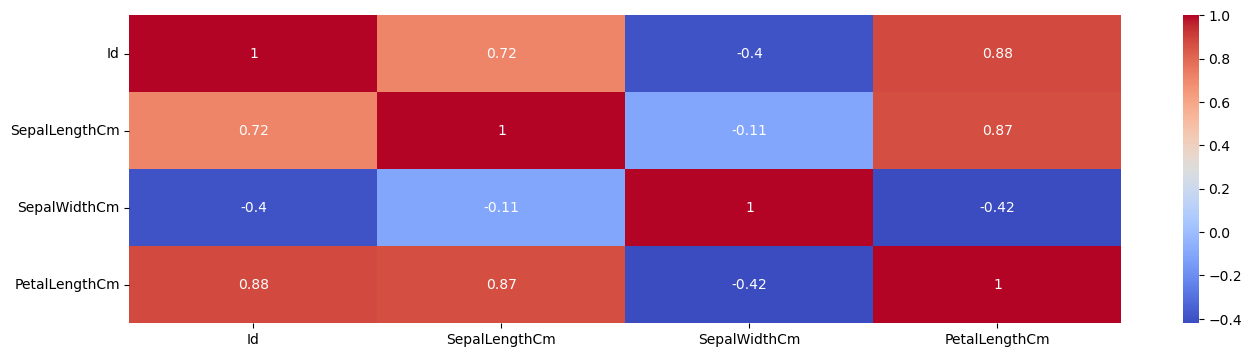

In [13]:
plt.figure(figsize=(16,4))
sns.heatmap(corelation_matrix, annot=True,cmap='coolwarm')
plt.show()

<Axes: ylabel='PetalWidthCm'>

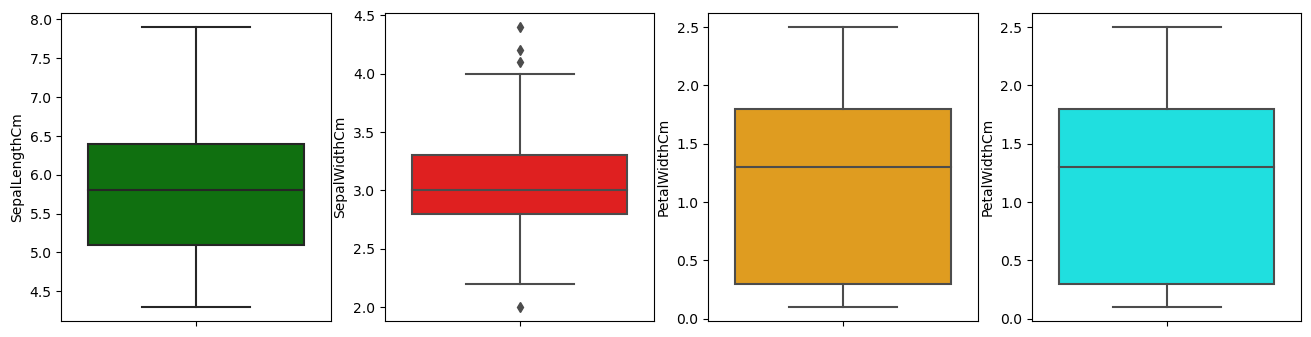

In [14]:
# plotting box plot to recognize outlier
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.boxplot(data=iris_df,y='SepalLengthCm', color='green')
plt.subplot(1,4,2)
sns.boxplot(data=iris_df,y='SepalWidthCm',color='red')
plt.subplot(1,4,3)
sns.boxplot(data=iris_df,y='PetalWidthCm',color='orange')
plt.subplot(1,4,4)
sns.boxplot(data=iris_df,y='PetalWidthCm',color='cyan')

In [15]:
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<Axes: ylabel='PetalWidthCm'>

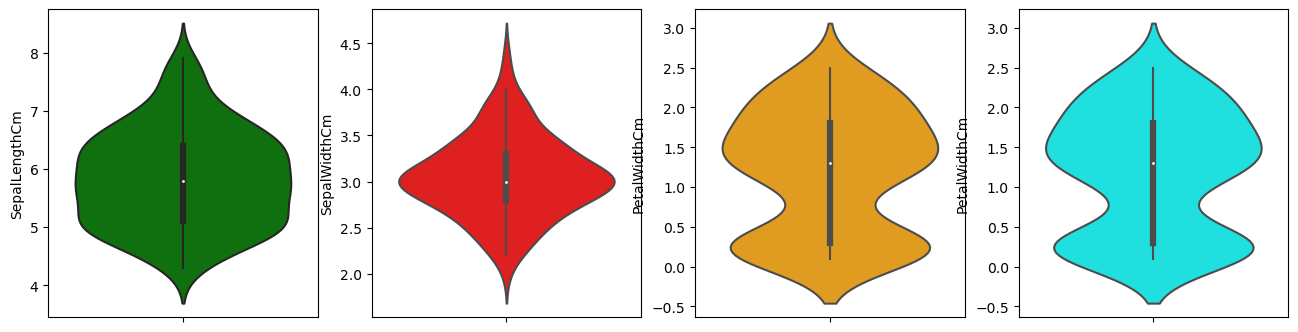

In [16]:
# plotting violin plot to recognize intensity of values
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.violinplot(data=iris_df,y='SepalLengthCm', color='green')
plt.subplot(1,4,2)
sns.violinplot(data=iris_df,y='SepalWidthCm',color='red')
plt.subplot(1,4,3)
sns.violinplot(data=iris_df,y='PetalWidthCm',color='orange')
plt.subplot(1,4,4)
sns.violinplot(data=iris_df,y='PetalWidthCm',color='cyan')

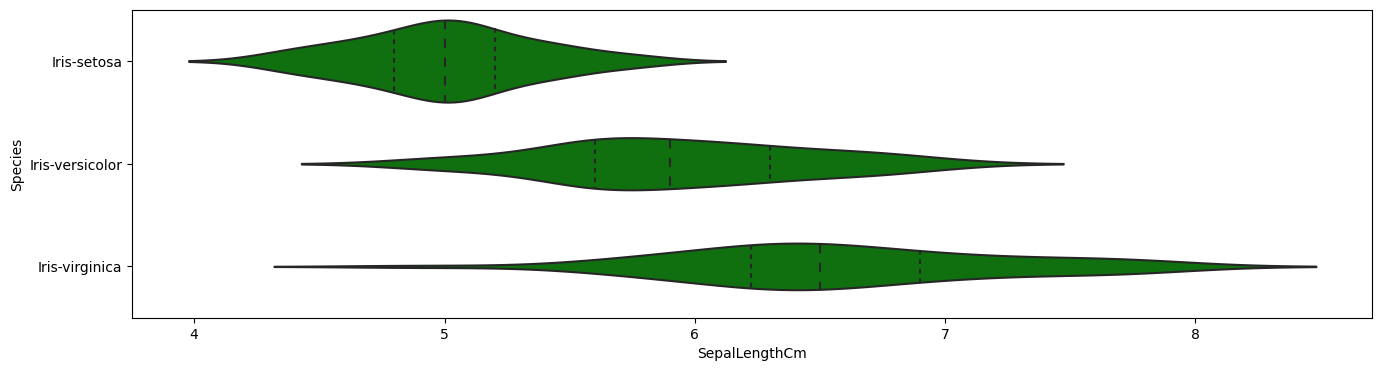

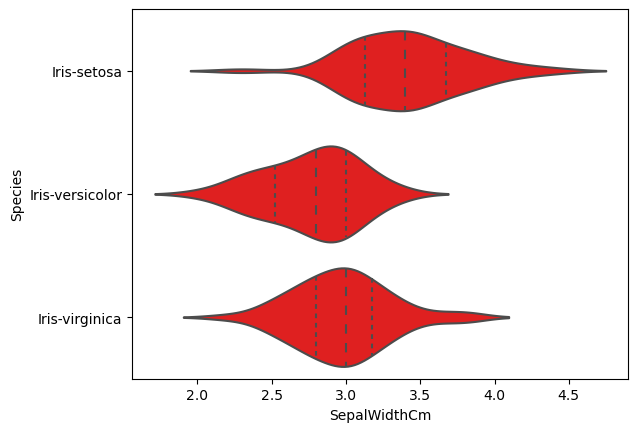

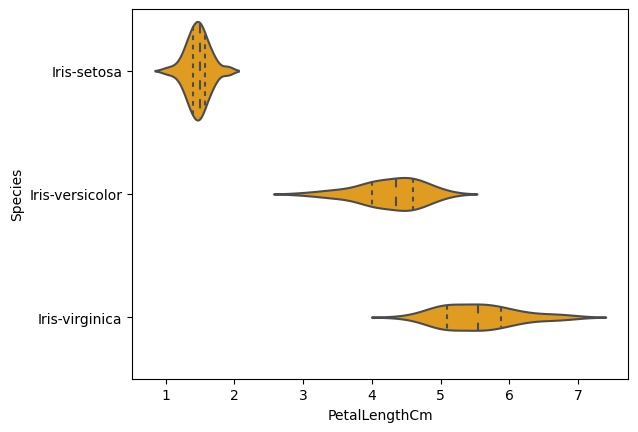

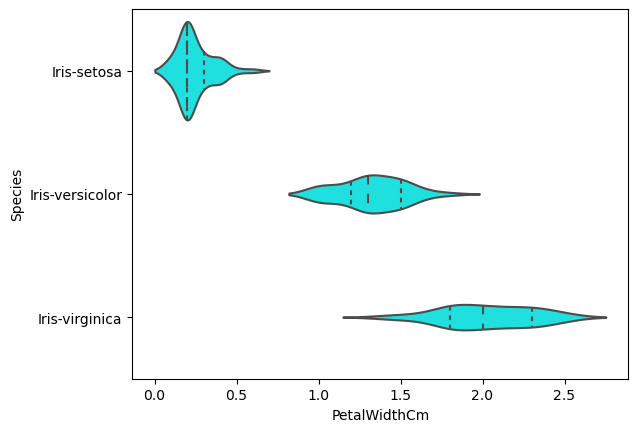

In [17]:
# Bivariate analysis : Numerical based on a Categorical data intensity
plt.figure(figsize = (16,4))
sns.violinplot(y='Species', x='SepalLengthCm', data=iris_df, inner='quartile', color='green')
plt.show()
sns.violinplot(y='Species', x='SepalWidthCm', data=iris_df, inner='quartile', color='red')
plt.show()
sns.violinplot(y='Species', x='PetalLengthCm', data=iris_df, inner='quartile', color='orange')
plt.show()
sns.violinplot(y='Species', x='PetalWidthCm', data=iris_df, inner='quartile', color='cyan')
plt.show()

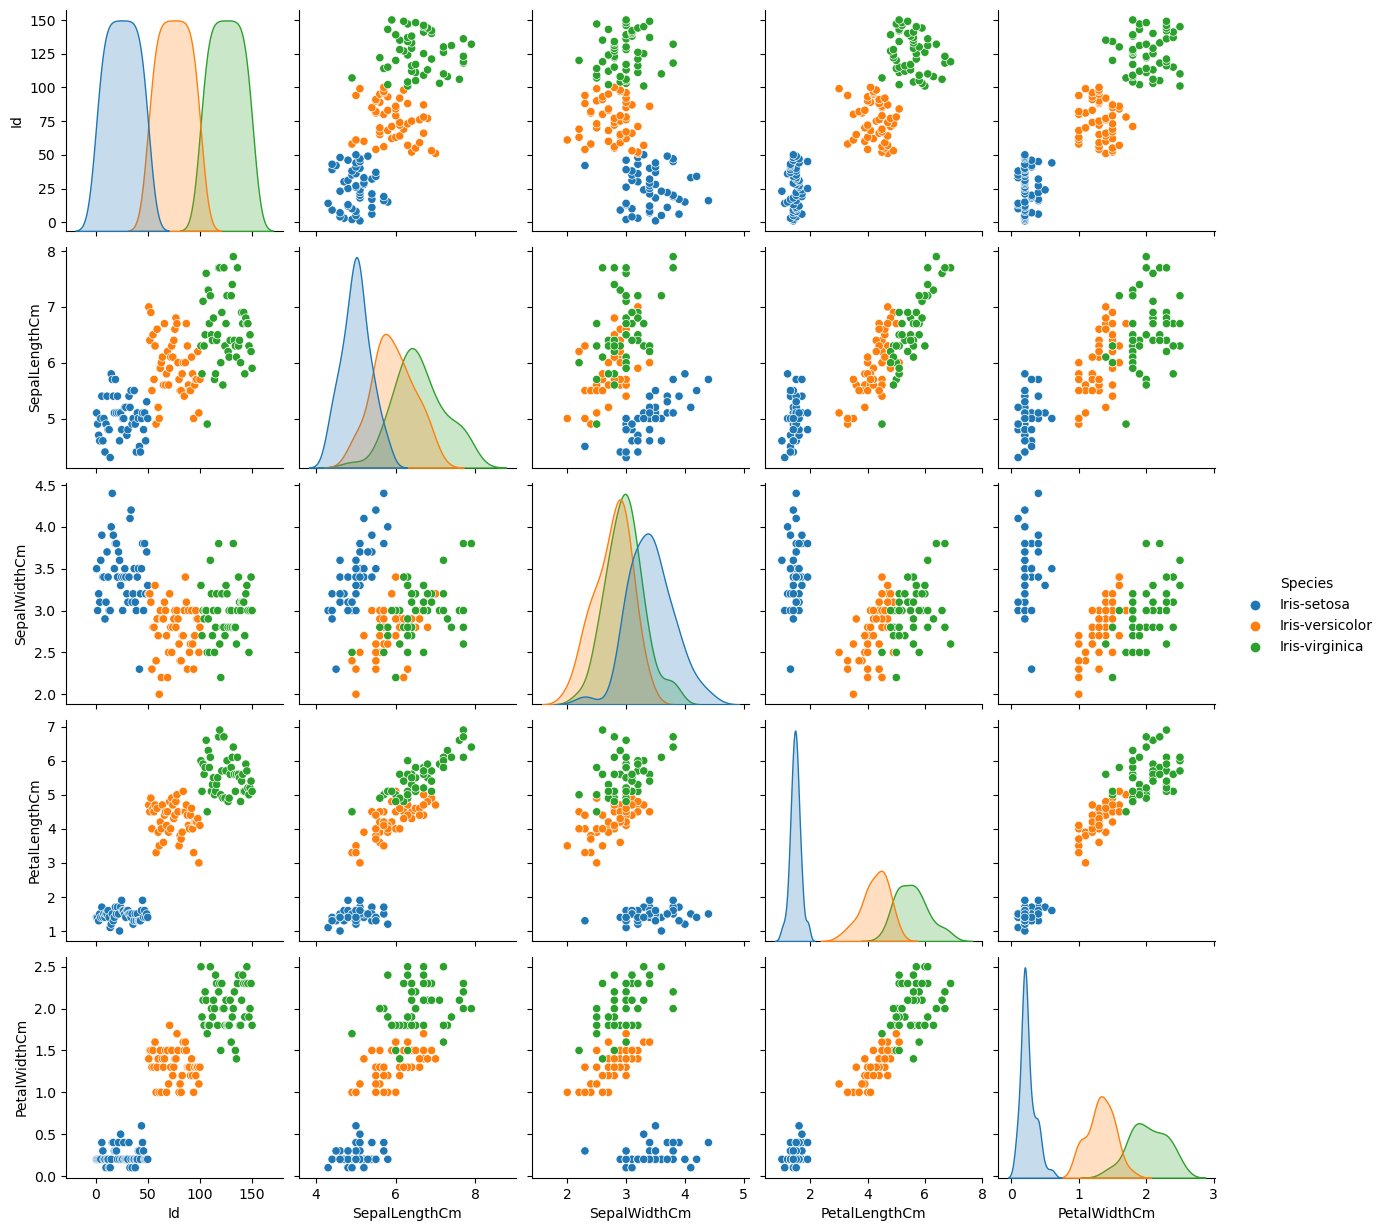

In [18]:
# Now, Plotting matix of graphs that enables visuals of relationship between each pair of variables in a dataset
sns.pairplot(iris_df,hue="Species")
plt.show()

# Training and Testing


In [19]:
# Building Model
X = iris_df.drop(columns=['Species'])
Y = iris_df['Species']
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3)
print(f"Shape Of Training Data Set : ",x_train.shape)
print(f"Shape Of Testing Data Set :",x_test.shape)
print(f"Shape Of Train Label :",y_train.shape)
print(f"Shape Of Test Label :",y_test.shape)

Shape Of Training Data Set :  (105, 5)
Shape Of Testing Data Set : (45, 5)
Shape Of Train Label : (105,)
Shape Of Test Label : (45,)


In [20]:
def report(model):
    preds=model.predict(x_test)
    print(classification_report(preds,y_test))

In [21]:
#Logistic Regression
lg= LogisticRegression(max_iter=1000)
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
score1=accuracy_score(y_test,y_pred)
report(lg)
accuracy_lg = round(score1*100,2)
print(f'Accuracy: {accuracy_lg}%')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.97        45
   weighted avg       0.98      0.98      0.98        45

Accuracy: 97.78%


In [22]:
# Applying Decsion Tree Algorithm 
DTC = DecisionTreeClassifier()
DTC=DTC.fit(x_train,y_train)
y_pred=DTC.predict(x_test)
score3=accuracy_score(y_test,y_pred)
report(DTC)
accuracy_dtc = round(score3*100,2)
print(f'Accuracy: {accuracy_lg}%')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.97        45
   weighted avg       0.98      0.98      0.98        45

Accuracy: 97.78%


In [23]:
# Comapring both the algorithm,
cols = [
    ["Logistic Regression",accuracy_lg],
    ["Decision Trees", accuracy_dtc],
    ]
results = pd.DataFrame( cols,
                       columns = ["Model","Accuracy %"]).sort_values(
                        by="Accuracy %",ascending=False)
results.style.background_gradient(cmap='Set1')

,Model,Accuracy %
0,Logistic Regression,97.780000
1,Decision Trees,97.780000


# Decision Tree Model


In [24]:
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [25]:
std = StandardScaler()
X = std.fit_transform(X)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1)

In [27]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [28]:
y_pred = model.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [29]:
# Accuracy Score of Model
acc = accuracy_score(y_test, y_pred)
print("The Accuracy of the Decision Tree Algorithms is : ", str(acc*100) + "%")
cm = confusion_matrix(y_test, y_pred)
cm

The Accuracy of the Decision Tree Algorithms is :  97.77777777777777%


array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 13]], dtype=int64)

In [30]:
lst = iris_df['Species'].unique().tolist()
df_cm = pd.DataFrame(data = cm, index = lst, columns = lst)
df_cm

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,14,0,0
Iris-versicolor,0,17,1
Iris-virginica,0,0,13


In [31]:
col = iris_df.columns.tolist()
print(col)

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


# Model Visualization

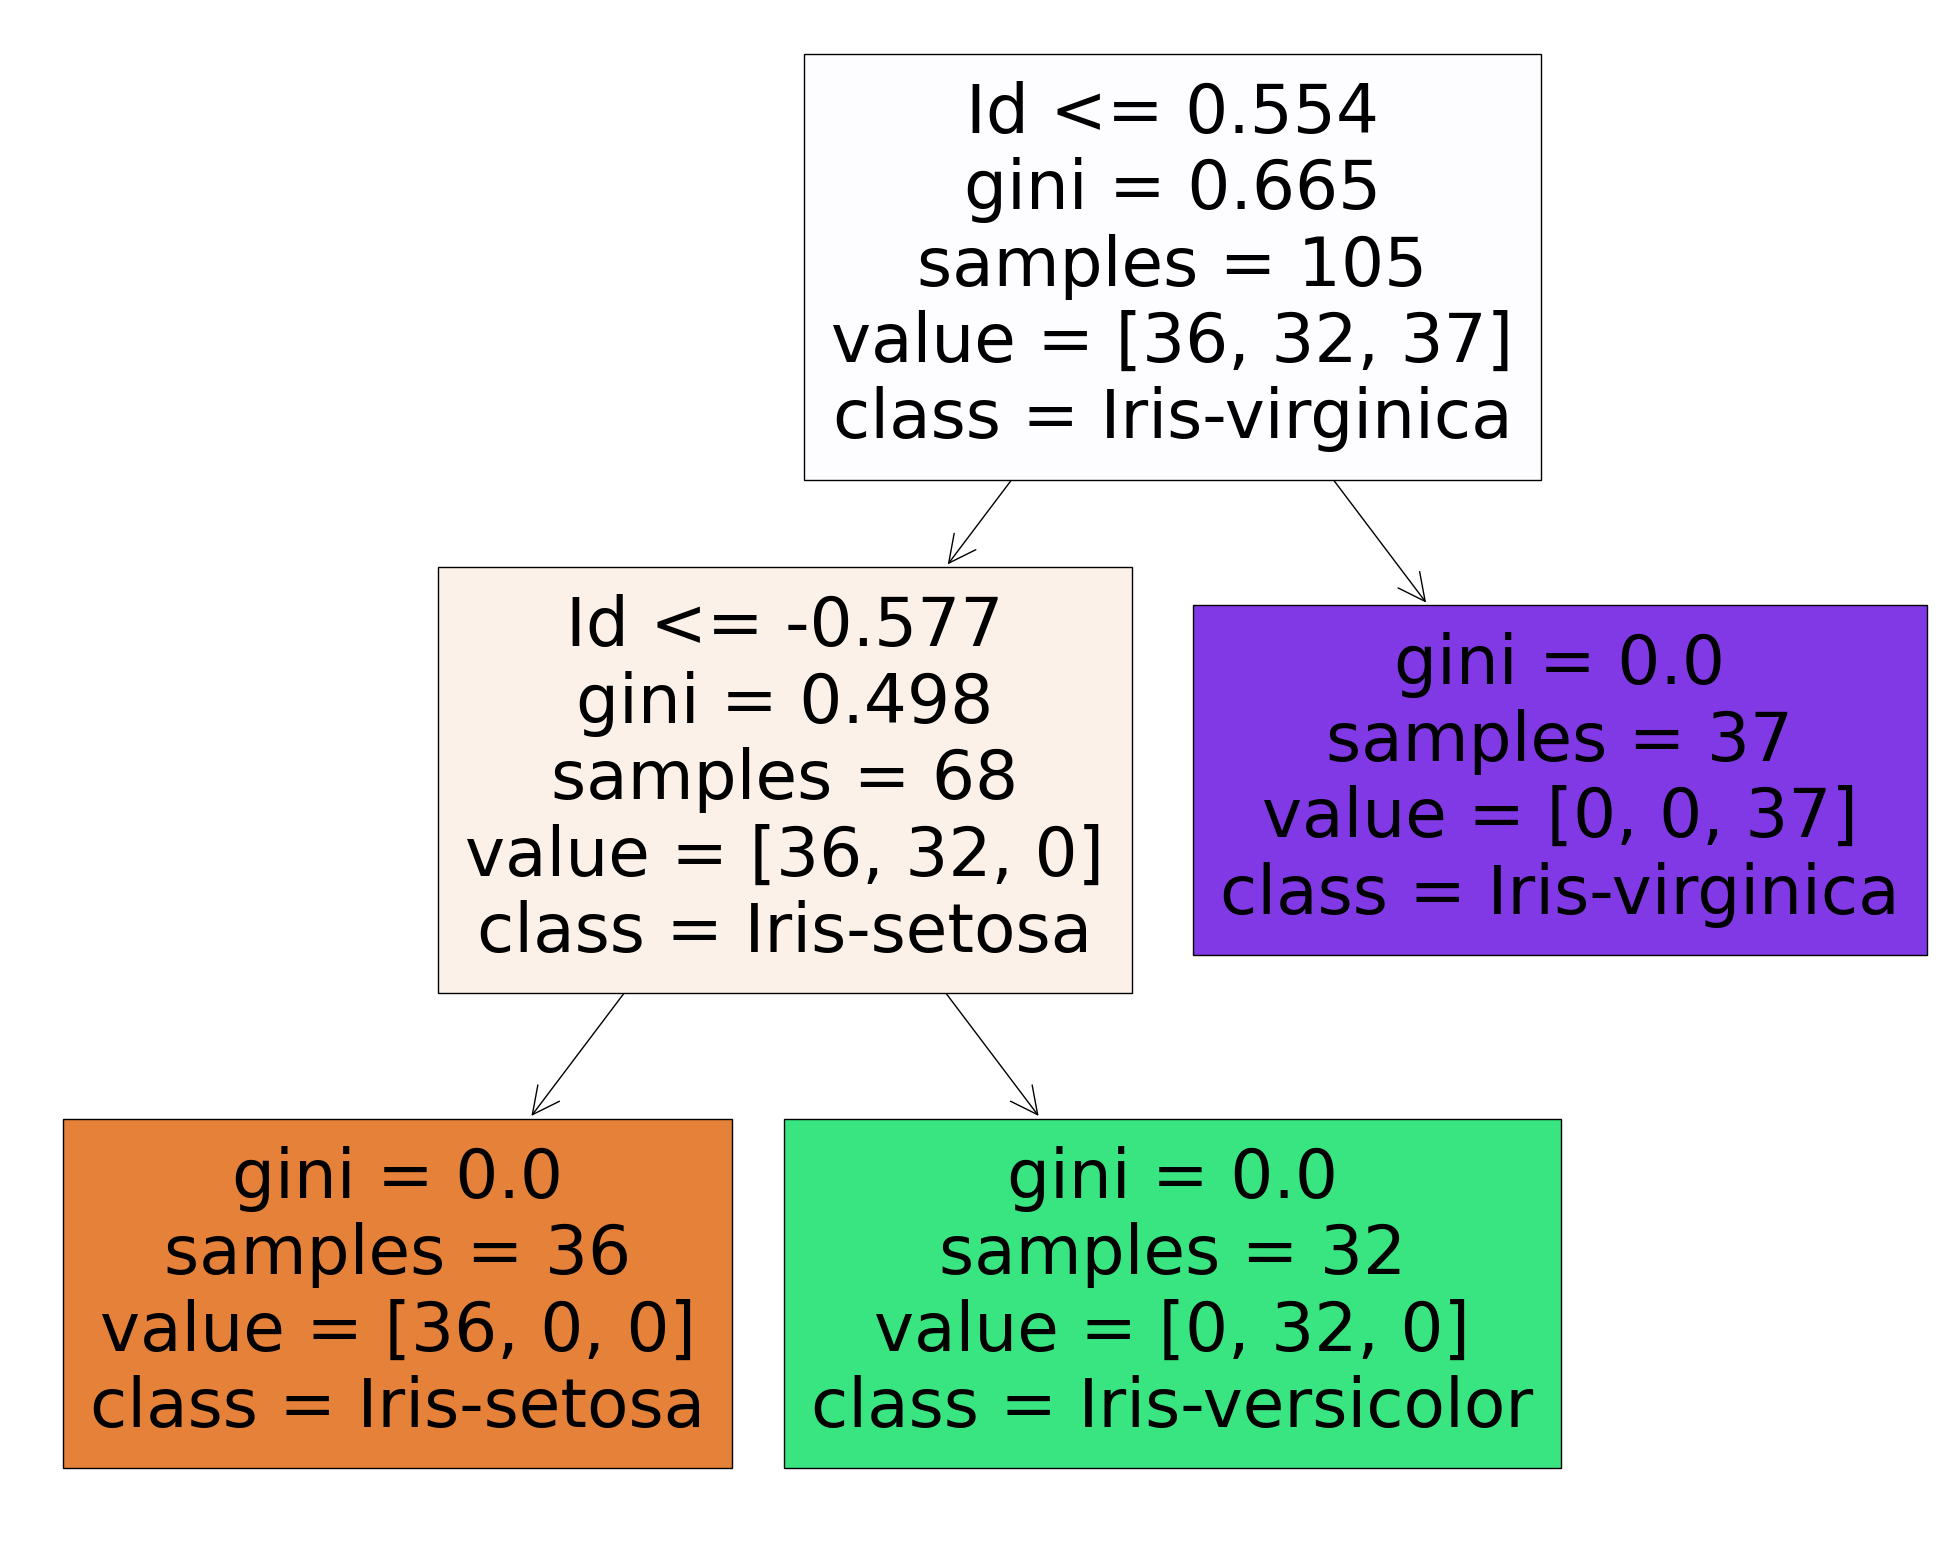

In [32]:
fig = plt.figure(figsize=(25, 20))
tree_img = plot_tree(model, feature_names = col, class_names = lst, filled = True)